In [2]:
import numpy as np
import mip as mp
import matplotlib.pyplot as plt

In [3]:
m = mp.Model()

A = m.add_var(name='Grano', var_type=mp.CONTINUOUS, lb=0)
B = m.add_var(name='Wheatie', var_type=mp.CONTINUOUS, lb=0)

m.objective = mp.maximize(A + 1.35 * B)

m += A * 0.2 + B * 0.4 <= 60
m += A <= 200
m += B <= 120

m.optimize()

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 1 (-2) rows, 2 (0) columns and 2 (-2) elements
Clp1000I sum of infeasibilities 0 - average 0, 2 fixed columns
Coin0506I Presolve 0 (-1) rows, 0 (-2) columns and 0 (-2) elements
Clp0000I Optimal - objective value -0
Clp0000I Optimal - objective value -0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0000I Optimal - objective value 267.5
Clp0000I Optimal - objective value 267.5
Clp0000I Optimal - objective value 267.5
Coin0511I After Postsolve, objective 267.5, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 267.5 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00


<OptimizationStatus.OPTIMAL: 0>

In [4]:
print(f"Produção de Grano: {A.x:.4f}")
print(f"Produção de Wheatie: {B.x:.4f}")
print(f"Max return: {m.objective_value}")

Produção de Grano: 200.0000
Produção de Wheatie: 50.0000
Max return: 267.5


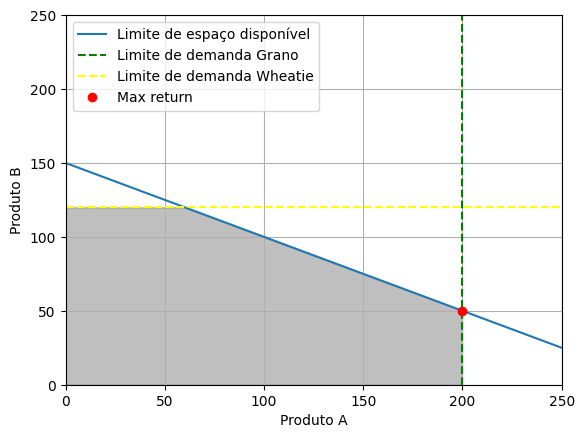

In [32]:
x = np.linspace(0, 250, 250)

r1 = (60 - 0.2 * x) / 0.4
plt.plot(x, r1, label="Limite de espaço disponível")

r2 = 200
plt.axvline(r2, color='green', linestyle='--', label="Limite de demanda Grano")

r3 = 120
plt.axhline(r3, color='yellow', linestyle='--', label="Limite de demanda Wheatie")

plt.xlim(0, 250)
plt.ylim(0, 250)

plt.xlabel("Produto A")
plt.ylabel("Produto B")
plt.plot(A.x, B.x, 'ro', label="Max return")
plt.fill_between(x, np.minimum(r1, r3), where=(x <= r2), color='gray', alpha=0.5)

plt.grid()
plt.legend()
plt.show()